## Unit 1 / Lesson 3 / Project 3

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
df_customer = pd.read_csv("../data-201-resources-master/customers_data.csv")

In [51]:
df_customer.head(10)

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False
5,5,39.66,female,no,6.0,79.0,False
6,6,43.96,male,yes,36.0,64.0,False
7,7,6.09,female,yes,36.0,67.0,False
8,8,25.89,female,no,28.0,53.0,False
9,9,93.63,female,no,40.0,47.0,True


In [55]:
df_agesort = df_customer.loc[df_customer['age']>0,].groupby(["age"]).mean()

In [56]:
df_agesort.head(5)

,Unnamed: 0,purch_amt,days_since_last_purch,loyalty
age,,,,
1.0,63797.283843,40.620175,57.148472,0.017467
2.0,58931.754513,43.005704,59.660650,0.057762
3.0,58045.632979,41.833617,58.194149,0.050532
4.0,59106.159827,42.325616,57.846652,0.062635
5.0,60921.903915,42.519911,58.704626,0.083630


Choose one variable and plot that variable four different ways. 
1) histogram plots
2) histogram plots by gender and loyalty
3) barplot 
4) pointplot


Line plots showing purchase amount distribution in dollar


Text(0.5,1,'Plot 1: Purchase Amount Distribution')

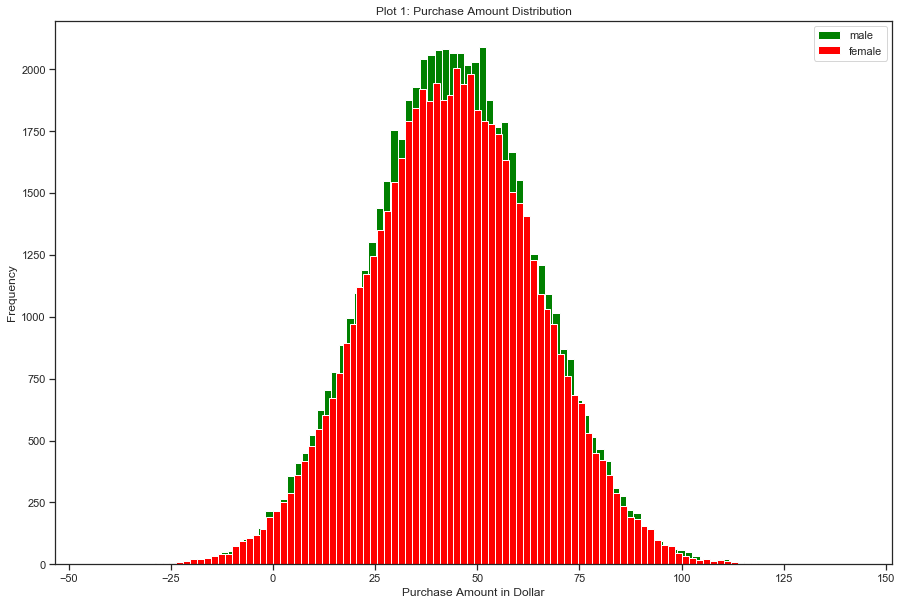

In [43]:
maleamt = df_customer.loc[(df_customer['gender']=='male'), 'purch_amt']
femaleamt = df_customer.loc[(df_customer['gender']=='female'), 'purch_amt']
                         
plt.figure(figsize=(15,10))
plt.hist(maleamt, bins=100, color='green', label='male')
plt.legend(loc='upper right')
plt.hist(femaleamt, bins=100, color='red', label='female')
plt.legend(loc="upper right")
plt.xlabel('Purchase Amount in Dollar')
plt.ylabel('Frequency')
plt.title('Plot 1: Purchase Amount Distribution')

Line plots showing purchase amount distribution in dollar per Gender per Loyalty


<Figure size 1080x720 with 0 Axes>

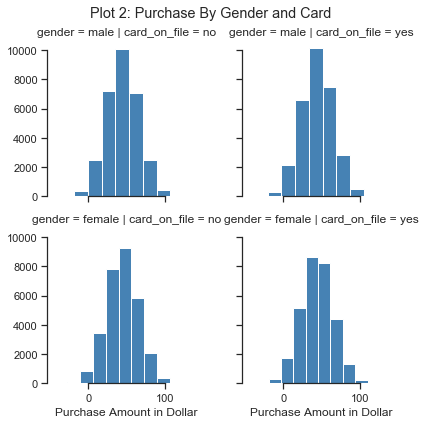

In [44]:
print("Line plots showing purchase amount distribution in dollar per Gender per Loyalty")
plt.figure(figsize=(15,10))
sns.set(style="ticks")
graph = sns.FacetGrid(df_customer, row="gender", col="card_on_file")
graph.map(plt.hist, "purch_amt", color="steelblue")
plt.subplots_adjust(top=0.9)
graph.set_axis_labels("Purchase Amount in Dollar")
plt.suptitle("Plot 2: Purchase By Gender and Card")
sns.despine(trim=True)
plt.show()

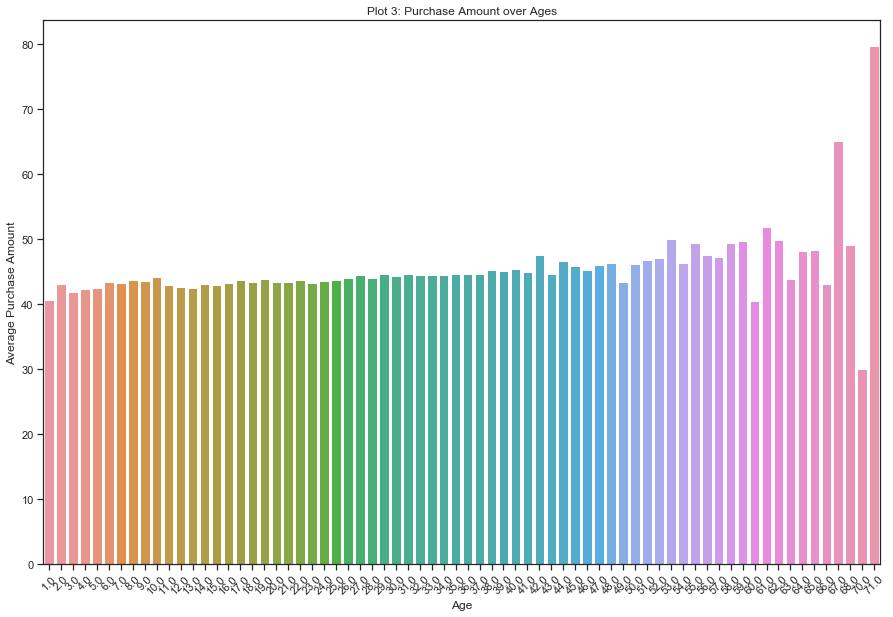

In [83]:
df_agesort = df_customer.loc[df_customer['age']>0].groupby(['age']).mean()
temp = (df_customer.loc[(df_customer['age']>0), 'age'].sort_values(ascending=True).unique())
df_agesort['age'] = temp

plt.figure(figsize=(15,10))
sns.barplot(x=df_agesort['age'], y=df_agesort['purch_amt'])
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.title('Plot 3: Purchase Amount over Ages')
plt.show()

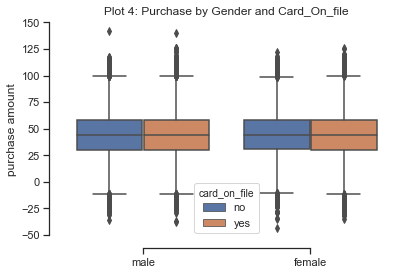

In [84]:
axe = sns.boxplot(x='gender', y='purch_amt', hue='card_on_file', data=df_customer)
plt.title("Plot 4: Purchase by Gender and Card_On_file")
sns.despine(offset=10, trim=True)
axe.set(xlabel='', ylabel='purchase amount')
plt.show()

## Choose two continuous variables, and plot them three different ways. 1_ scatter plot 2) barplot 3) poitplot

<Figure size 1080x720 with 0 Axes>

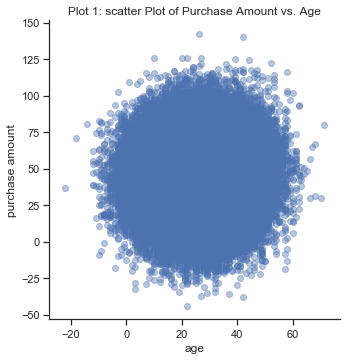

In [86]:
plt.figure(figsize=(15,10))
graph = sns.lmplot(x='age', y='purch_amt', data=df_customer, fit_reg=False, scatter_kws={'alpha':0.4})
graph.set_xlabels('age')
graph.set_ylabels('purchase amount')
plt.title('Plot 1: scatter Plot of Purchase Amount vs. Age')
plt.show()

<Figure size 1080x720 with 0 Axes>

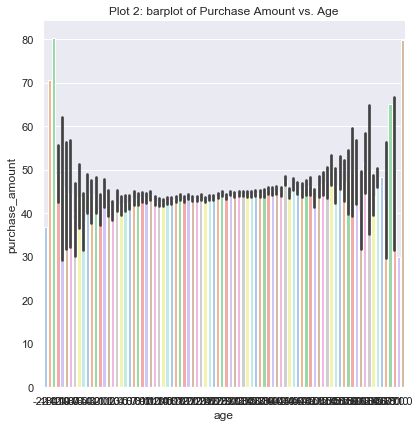

In [88]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
graph = sns.catplot(x='age', y='purch_amt', data=df_customer,
                        height=6, kind='bar', palette='pastel', ci=95)
graph.despine()
graph.set_xlabels("age")
graph.set_ylabels("purchase_amount")
plt.title("Plot 2: barplot of Purchase Amount vs. Age")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


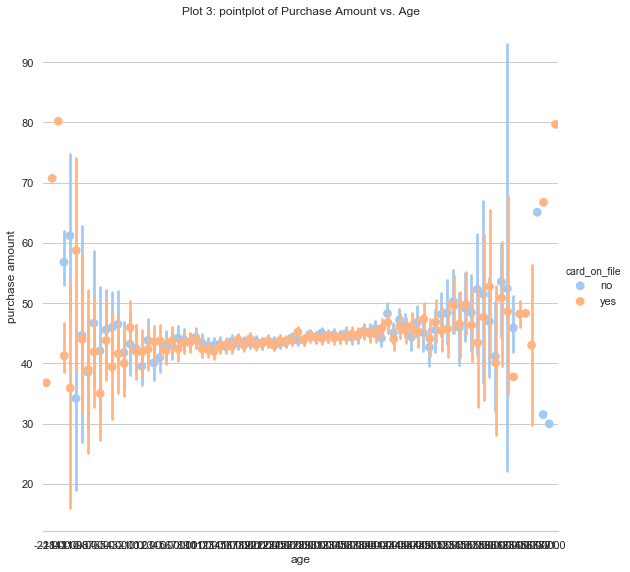

In [89]:
sns.set(style='whitegrid')
graph = sns.catplot(x='age', y='purch_amt', hue='card_on_file', data=df_customer,
                   height=8, kind='point', palette='pastel', ci=95, dodge=True, join=False)
graph.despine(left=True)
graph.set_xlabels('age')
graph.set_ylabels('purchase amount')
plt.title("Plot 3: pointplot of Purchase Amount vs. Age")
plt.show()

Choose one continuous variable and one categorical variable, and plot them six different ways.

Line plots showing purchase amount distribution in dollar per Gender


<Figure size 1440x1080 with 0 Axes>

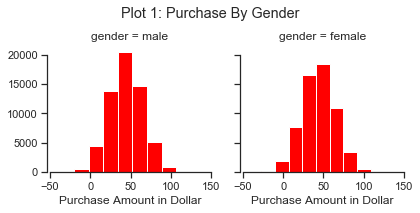

In [97]:
print("Line plots showing purchase amount distribution in dollar per Gender")
plt.figure(figsize=(20,15))
sns.set(style="ticks")
graph = sns.FacetGrid(df_customer, col="gender")
graph.map(plt.hist, "purch_amt", color="red")
plt.subplots_adjust(top=0.8)
graph.set_axis_labels("Purchase Amount in Dollar")
plt.suptitle("Plot 1: Purchase By Gender")
sns.despine(trim=True)
plt.show()

<Figure size 1080x720 with 0 Axes>

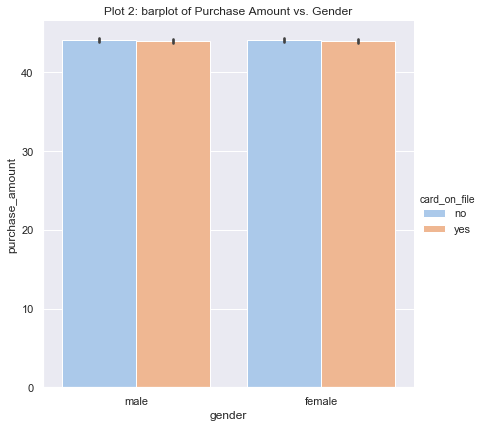

In [99]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
graph = sns.catplot(x='gender', y='purch_amt', hue='card_on_file', data=df_customer,
                        height=6, kind='bar', palette='pastel', ci=95)
graph.despine()
graph.set_xlabels("gender")
graph.set_ylabels("purchase_amount")
plt.title("Plot 2: barplot of Purchase Amount vs. Gender")
plt.show()

<Figure size 1080x720 with 0 Axes>

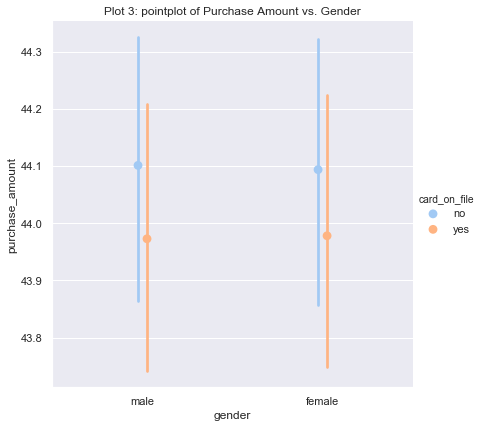

In [100]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
graph = sns.catplot(x='gender', y='purch_amt', hue='card_on_file', data=df_customer,
                        height=6, kind='point', palette='pastel', ci=95,dodge=True,join=False)
graph.despine()
graph.set_xlabels("gender")
graph.set_ylabels("purchase_amount")
plt.title("Plot 3: pointplot of Purchase Amount vs. Gender")
plt.show()

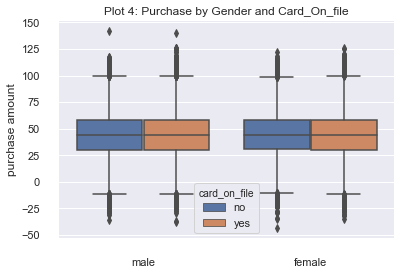

In [101]:
axe = sns.boxplot(x='gender', y='purch_amt', hue='card_on_file', data=df_customer)
plt.title("Plot 4: Purchase by Gender and Card_On_file")
sns.despine(offset=10, trim=True)
axe.set(xlabel='', ylabel='purchase amount')
plt.show()

In [ ]:
df_agesort = df_customer.loc[df_customer['age']>0].groupby(['age']).mean()
temp = (df_customer.loc[(df_customer['age']>0), 'age'].sort_values(ascending=True).unique())
df_agesort['age'] = temp

plt.figure(figsize=(15,10))
sns.barplot(x=df_agesort['age'], y=df_agesort['purch_amt'])
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.title('Plot 3: Purchase Amount over Ages')
plt.show()